In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 8in by 6in

# Assignment 02: Implementing Linear Regression

**Due Date:** Friday 9/30/2015 (by midnight)


## Introduction 

In this exercise, you will implement linear regression and get to see it work
on data. Before starting on this programming exercise, we strongly recom-
mend watching the video lectures and completing the review quizes for
the class.

In this assignment, you need to fill out the cells with the required
code and tasks as described.  You should submit your whole completed
`.ipynb` notebook to the appropriate eCollege dropbox once you are
finished.



## Linear Regression with One Variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.
You would like to use this data to help you select which city to expand
to next.

### Task 1: Plotting the data
The data for this assignment is in a file called `assg-02-data.csv` in our course `data` directory.  In the next cell, load 
this data into a `pandas` dataframe called `data`.
Then get the first column into a `NumPy` array called `x` and the second column into a `NumPy` array called
'y'.  Set a variable called `m` to be equal to the number of training examples in the data you load from the file.

In [2]:
data = pd.read_csv('data/assg-02-data.csv')
x = data.population.as_matrix()
y = data.profit.as_matrix()
m = y.size
print m

97


The data in `x` (the inputs) represents the Population of a city in 10,000s of people.  The `y` represents the profit made for
each city in the training data, in \$10,000s of dollars.  Plot the profits made on the y axis as a function of the population size on the x axis
in the next cell.  Your final figure should look exactly like this (don't forget to label your axis, and set a title for the
figure):

<img src="files/figures/assg-02-plot-1.png">

In [3]:
# create your plot here

### Task 2: Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset by hand using gradient
descent.  Recall that the objective of linear regression is to minimize the cost function:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \big( h_{\theta}(x^{(i)}) - y^{(i)} \big)^2
$$

where the hypothesis $h_{\theta}(x)$ is given by the linear model:

$$
h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1
$$

Recall that the parameters of your model are the $\theta_j$ values.  These are the values that you
will adjust in order to minimize the cost function $J(\theta)$.  One way to do this as we discussed
is to use the batch gradient descent algorithm.  In batch gradient descent, each iteration performs
the update:

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \big( h_{\theta}(x^{(i)}) - y^{(i)} \big) x_j^{(i)}
$$

(where we simultaneously update $\theta_j$ for all j)

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal
values that will achieve the lowest cost $J(\theta)$.

**Implementation**

In the next cell, we have already set up the data for linear regression (using linear algebra
operations to perform the calculations) for you.  In the following cell, we add another dimension to our
data to accommodate the $\theta_0$ intercept term.

In [4]:
# the raw data
data = pd.read_csv('data/assg-02-data.csv')
x = data.population.as_matrix() # the raw inputs
y = data.profit.as_matrix() # the correct outputs
m = y.size

# X needs to be a 2xm shaped set of data, where the first value in each column
# is a 1.0, and the next value in each column is our raw inputs
X = np.ones( (2, m) )
X[1,:] = x # the second row contains the raw inputs

print m
print X.shape
#print X

97
(2, 97)


**Computing the cost $J(\theta)$**

As you perform gradient descent to minimize the cost function $J(\theta)$, it is helpful to monitor
the convergence by computing the cost.  In this section, you will implement a function to calculate
$J(\theta)$ so you can check the convergence of your gradient descent implementation.

Your next task is to complete the code in the following cell, which is a function that computes
the cost function $J(\theta)$.  As you are implementing this function, rememebr that the variables
`X` and `y` are not scalar values, but a $97 \times 2$ matrix and a $97$ item vector whose rows
represent examples from the training set respectively.



In [5]:
def compute_cost(X, y, theta):
    """Compute the cost function for linear regression.  
    
    Given a set of inputs X (we assume that the first column has been 
    initialized to 1's for the theta_0 parameter), and the correct 
    outputs for these inputs y, calculate the hypothesized outputs 
    for a given set of parameters theta.  Then we compute the sum of
    the squared differences (and divide the final result by 2*m), 
    which gives us the cost.
    
    Args
    ----
    X (numpy mxn array) - The example inputs, first column is expected
       to be all 1's.
    y (numpy m size array) - A vector of the correct outputs of length m
    theta (numpy nx1 array) - An array of the set of theta parameters
       to evaluate
       
    Returns
    -------
    J (float) - The sum squared difference cost function for the given
       theta parameters
    """
    
    # determine the number of training examples from the size of the correct outputs
    m = len(y)
    
    # You need to return the following variable correctly
    J = 0.0
    
    # ===== Your Code Here ======
    # Instructions: Compute the cost of a particular choice of theta
    # and return the resulting cost J
    # HINT: you should be able to use the transpose of theta and the np.dot() 
    # function to multiple theta.T and X, to get a set of hypothesis.  And you
    # should then be able to use numpy operations to compute the squared difference
    # without the need for any loops
    
    return J

Once you have completed the function, the next step is to test it.  Here are some examples of the correct
cost you should get, for some different values of the `theta` parameters.

```python
theta = np.zeros( (2, 1) )
print compute_cost(X, y, theta)
>>> 32.0727338775

theta = np.array([[1.0],
                  [1.0]])
print compute_cost(X, y, theta)
>>> 10.2665204914

theta = np.array([[2.0],
                  [2.0]])
print compute_cost(X, y, theta)
>>> 87.1838499274

```

In [6]:
theta = np.zeros( (2, 1) )
print compute_cost(X, y, theta)

theta = np.array([[1.0],
                  [1.0]])
print compute_cost(X, y, theta)

theta = np.array([[2.0],
                  [2.0]])
print compute_cost(X, y, theta)


0.0
0.0
0.0


**Gradient Descent**

Next you will implement the actual gradient descent iterative algorithm in the next cell.  The
loop structure for gradient descent has been written for you, and you only need to supply the 
updates to $\theta$ within each iteration.

As you program, make sure you understand what you are trying to optimize and what is being updated.
Keep in mind that the cost $J(\theta)$ is parameterized by the vector `theta`, not `X` and `y`.
That is, we minimize the value of $J(\theta)$ by changing the values of the vector `theta`, not
by changing `X` or `y`.  Refer to the equations from this assignment notebook and our lecture
notebooks if you are uncertain.

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$
and check that it is decreasign with each step.  The starter code for your gradient descent function
below calls `compute_cost` on every iteration and prints the cost.  Assuming you have implemented
gradient descent and compute cost correctly, your value of $J(\theta)$ should never increase, and
should converge to a steady value by the end of the algorithm.


In [7]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """Perform gradient descent iterative algorithm.
    
    Given a set of inputs X (we assume that the first column has been 
    initialized to 1's for the theta_0 parameter), and the correct 
    outputs for these inputs y, and an inital set of theta parameters,
    perform iterative gradient descent.  We successively modify the
    starting theta parameters in small steps, which should takes us
    towards the minimum of the cost function we are exploring.  alpha
    is our learning rate parameter, and currently this implementation is
    hardcoded to perform exactly num_iters iterations (instead of being
    adaptive).
    
    Args
    ----
    X (numpy mxn array) - The example inputs, first column is expected
       to be all 1's.
    y (numpy m array) - A vector of the correct outputs of length m
    theta (numpy nx1 array) - An array of the set of theta parameters
       to evaluate
    alpha (float) - The learning rate to use for iterative gradient
       descent
    num_iters (int) - The number of gradient descent iterations to perform
       
    Returns
    -------
    theta (numpy nx1 array) - The final theta parameters discovered after
        out gradient descent.
    J_history (numpy num_itersx1 array) - A history of the calculated
        cost for each iteration of our descent.
    """

    # initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros( (num_iters, 1) ) # an array of the history of our J cost function
    J_history[0] = compute_cost(X, y, theta) # the initial cost
    
    # perform num_iters iterations of the gradient descent
    for iter in range(1, num_iters):
        
        # ==== Your Code Here ====
        # Instructions: Perform a single gradient step on the parameter vector
        #    theta.  
        # HINT: While debugging, it can be useful to print out the
        #    values of the cost function (compute_cost) and gradient here.
        # HINT: remember that you must not update theta_0 and then compute
        #   the update for theta_1 withe the different theta.  You first need
        #   to calcuate all of the new theta parameters using the original,
        #   then do a simultaneous update
        
        # Save the cost J of every iteration in our history so we can return
        J_history[iter] = compute_cost(X, y, theta)
        
    # we return both the final theta parameters and the J_history of the cost
    return (theta, J_history)


In [8]:
# parameters for our algorithms
theta = np.zeros( (2, 1) )
iterations = 1500;
alpha = 0.01

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

If you have implemented gradient descent correctly, and you run the previous cell to perform gradient
descent starting at 0,0 for 1500 iterations, you should get pretty much the following values for
the final set of theta parameters and the history of your cost function:

```python
print theta
>>> [[-3.62981201]
     [ 1.16631419]]
     
print J_history
>>> [[ 32.07273388]
     [  6.73719046]
     [  5.93159357]
     ..., 
     [  4.4834581 ]
     [  4.48343473]
     [  4.48341145]]

```

In [9]:
print theta
print J_history

[[ 0.]
 [ 0.]]
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]


In the next cell, we replot the data and show your fitted model that was obtained through gradient
descent.  This next cell assumes that the `theta` array has model parameters for $\theta_0, \theta_1$
in them, and will draw a line on the graph representing whatever hypothesis is represented by the
`theta` parameters.

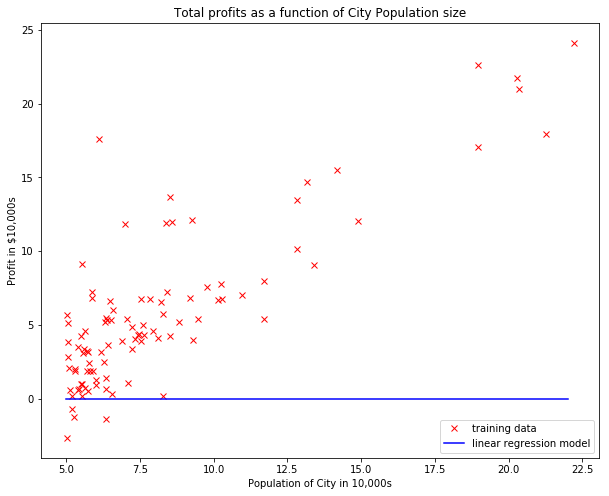

In [10]:
# plot the raw training data
plt.plot(x, y, 'rx', label='training data')

# plot a representative of our fitted model we learned through gradient
# descent
x_h = np.linspace(5.0, 22.0, 50)
hypothesis = theta[0] + theta[1] * x_h
plt.plot(x_h, hypothesis, 'b-', label='linear regression model')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in \$10,000s')
plt.title('Total profits as a function of City Population size')
plt.legend(loc=4)

** Visualizing $J(\theta)$ **

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid
of $\theta_0$ and $\theta_1$ values.  You will not need to code anything new for this part, but
you should understand how the code you have written already is creating these images.

In the next cell, there is code set up to calculate $J(\theta)$ over a grid ov values using the
`compute_cost` function that you wrote.  We use a slightly different method from our lecture
notebook where we showed you a contour plot of the cost function.  Here we explicitly use a loop
over pairs of $\theta_0$ and $\theta_1$ parameters, hopefully to make it as clear as possible how the
cost function is shaped and how we obtain it.

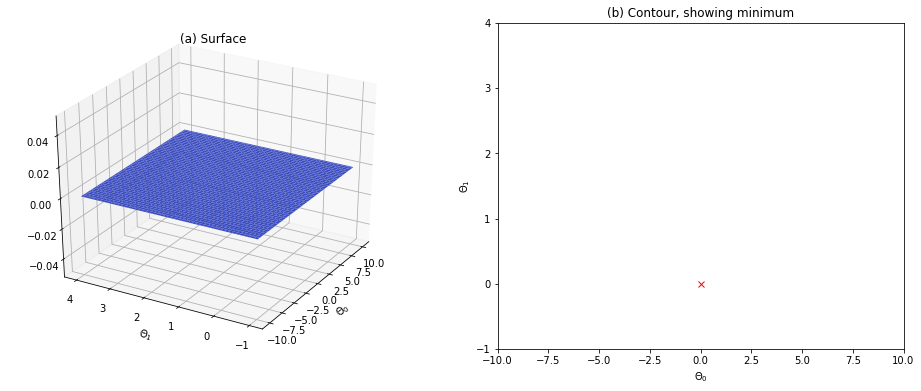

In [11]:
theta0_vals = np.linspace(-10.0, 10.0, 100)
theta1_vals = np.linspace(-1.0, 4.0, 100)
J_vals = np.zeros( (theta0_vals.size, theta1_vals.size) )

for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        theta_params = np.array([[ theta0_vals[i] ],
                          [ theta1_vals[j] ]])
        J_vals[i, j] = compute_cost(X, y, theta_params)

# because of the way contour plots work, we have to transpose
# J_vals before calling surf and coutour, or else the axes will
# be flipped
J_vals = J_vals.T

# do the plots
fig = plt.figure(figsize=(16,6))

### LEFT subplot
# show surface plot of the cost function in 3 dimensions
from mpl_toolkits.mplot3d.axes3d import Axes3D
t0, t1 = np.meshgrid(theta0_vals, theta1_vals)

ax = fig.add_subplot(1,2,1, projection='3d')
p = ax.plot_surface(t0, t1, J_vals, rstride=2, cstride=2, cmap=plt.cm.coolwarm)
ax.set_xlabel('$\Theta_0$')
ax.set_ylabel('$\Theta_1$')
ax.set_title('(a) Surface')
ax.azim = -150

### RIGHT subplot
# show contour plot, and plot the final theta we achieved using gradient descent
plt.subplot(1, 2, 2)
plt.contour(t0, t1, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title('(b) Contour, showing minimum')

# display the minimum we achieved with gradient descent on the contour
plt.plot(theta[0], theta[1], 'rx')

**Normal Equation Solution**

Again there is no coding here, but lets just compare the result you got using gradient descent, to
the exact solution to the minimum we obtain using the Normal Equation.  In the previous cell, you should
see that you got a gradient descent result after 1500 iterations somewhere around 
$\theta_0 = -3.6298, \theta_1 = 1.1663$.  Lets see what the exact solution gives us for the
$\theta_0, \theta_1$ parameters:

In [12]:
# for the normal equation, we need y in the form of a mx1 column matrix
m = y.size
y = y.reshape( (m, 1) )

# and actually we need X as an mx2 matrix, with ones in the first column.  
# this is slightly different from the shape for X we used previously, but
# this difference is due to using it before for calculating a set of hypothesis
# model values, and here we are using in our normal equation solution
X = np.ones( (m, 2) )
X[:,1] = x

# these lines implement (X^T X)^-1 X^T y
# this is the Normal Equation, the values given for Theta are the minimum
# fitted parameters for the given data
Tmp = np.linalg.inv(np.dot(X.T, X))
Theta = np.dot(np.dot(Tmp, X.T), y)
print Theta

# if we want to see what the actual minimum cost is, we need to put our
# X and y matrices back into the shapes we used for our compute_cost function
X = X.T
y = y.reshape( (m,) )
print compute_cost(X, y, Theta)

[[-3.89578088]
 [ 1.19303364]]
0.0


If you have everything working, you should see that the actual minimum solution obtained
from the normal equation is close to where we ended up with gradient descent, and that the
absolute minimum model we can fit (using our given input parameters) has a cost of
4.4769.
